In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime 
from datetime import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement=Base.classes.measurement
station=Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

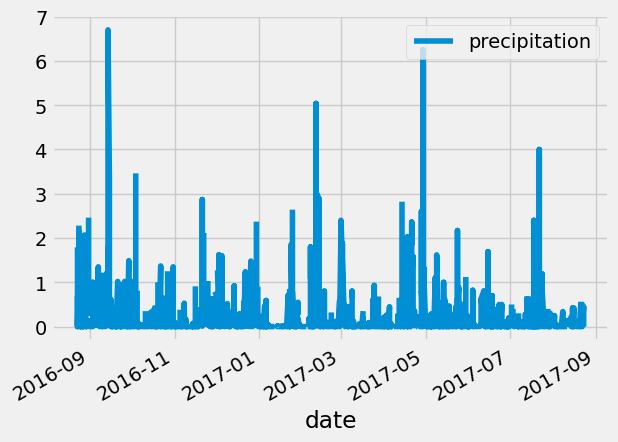

In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
m=measurement
# Calculate the date one year from the last date in data set.
last_date=session.query(m.date).order_by(m.date.desc()).first()[0]
last_date=dt.strptime(last_date,'%Y-%m-%d')
one_year_ago=last_date - datetime.timedelta(days=366)
# Perform a query to retrieve the data and precipitation scores
precipitation_data=session.query( m.date, m.prcp).order_by(measurement.date.desc()).filter(measurement.date > one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df=pd.DataFrame(precipitation_data,columns=['date', 'precipitation'])

# Sort the dataframe by date
precipitation_df.date = pd.to_datetime(precipitation_df.date)
precipitation_df.sort_values(by=['date'], inplace=True)
precipitation_df.set_index('date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot()
#plt.tight_layout()
plt.legend(['precipitation'],loc='upper right')
plt.show()

In [22]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [23]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.station).distinct().count()

9

In [24]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations=session.query(*[measurement.station,func.count(measurement.station)]).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

calcs=[func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)]
most_active_station=session.query(*calcs).filter(measurement.station==stations[0][0]).all()
most_active_station


[(54.0, 85.0, 71.66378066378067)]

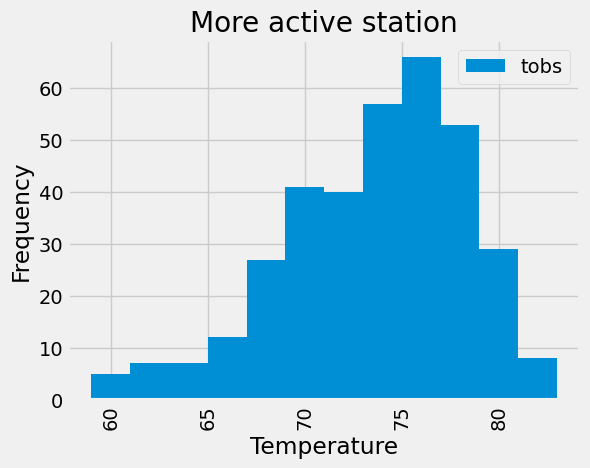

In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

m=measurement
# Calculate the date one year from the last date in data set.
last_date=session.query(m.date).order_by(m.date.desc()).first()[0]
last_date=dt.strptime(last_date,'%Y-%m-%d')
one_year_ago=last_date - datetime.timedelta(days=366)
# Perform a query to retrieve the data and precipitation scores
precipitation_data=session.query(m.station, m.tobs).order_by(measurement.date.desc())\
.filter(measurement.date > one_year_ago).filter(measurement.station==stations[0][0]).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df=pd.DataFrame(precipitation_data,columns=['station', 'tobs'])

precipitation_df.set_index('station', inplace=True)
precipitation_df.hist(by='station',bins=12, legend=True)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title("More active station")

plt.show()

# Close Session

In [27]:
# Close Session
session.close()